In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from transformers import pipeline
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')

[nltk_data] Error loading vader_lexicon: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

In [2]:
df = pd.read_csv('all_banks_reviews_cleaned.csv')
df.head()

,review,rating,date,review_length,bank,source
0,"""Why don’t your ATMs support account-to-accoun...",4,2025-06-06,111,CBE,Google Play Store
1,what is this app problem???,1,2025-06-05,27,CBE,Google Play Store
2,the app is proactive and a good connections.,5,2025-06-05,44,CBE,Google Play Store
3,I cannot send to cbebirr app. through this app.,3,2025-06-05,47,CBE,Google Play Store
4,good,4,2025-06-05,4,CBE,Google Play Store


In [5]:
print(df.columns)


Index(['review', 'rating', 'date', 'review_length', 'bank', 'source'], dtype='object')


In [6]:
sia = SentimentIntensityAnalyzer()
df['sentiment_scores'] = df['review'].apply(lambda x: sia.polarity_scores(x))
df[['neg', 'neu', 'pos', 'compound']] = df['sentiment_scores'].apply(pd.Series)
df.drop(columns=['sentiment_scores'], inplace=True)


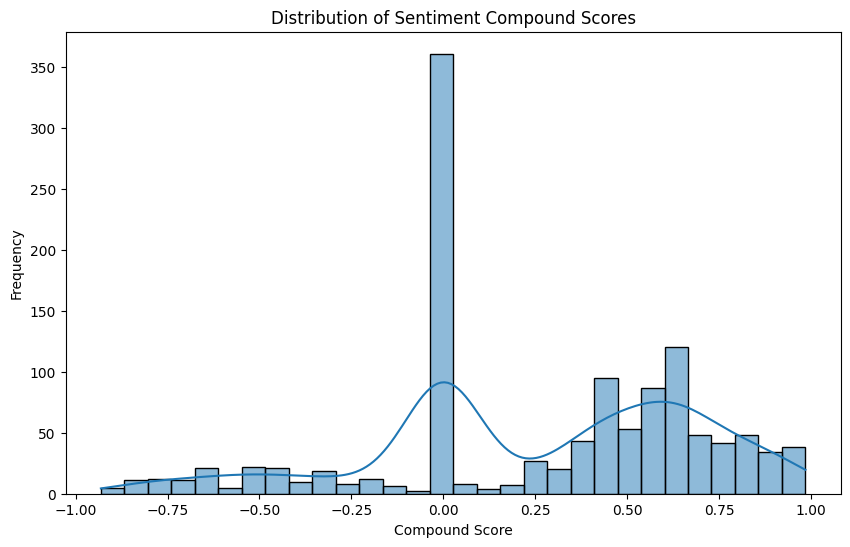

In [10]:
sia = SentimentIntensityAnalyzer()

df['sentiment_scores'] = df['review'].apply(lambda x: sia.polarity_scores(str(x)))
df[['neg', 'neu', 'pos', 'compound']] = df['sentiment_scores'].apply(pd.Series)
df.drop(columns=['sentiment_scores'], inplace=True)

plt.figure(figsize=(10,6))
sns.histplot(df['compound'], bins=30, kde=True)
plt.title('Distribution of Sentiment Compound Scores')
plt.xlabel('Compound Score')
plt.ylabel('Frequency')
plt.show()

In [11]:
def classify_sentiment(score):
    if score >= 0.05:
        return 'Positive'
    elif score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

df['sentiment_label'] = df['compound'].apply(classify_sentiment)


In [12]:
print(df['sentiment_label'].value_counts())


sentiment_label
Positive    673
Neutral     363
Negative    164
Name: count, dtype: int64


In [13]:
sentiment_by_bank = df.groupby(['bank', 'sentiment_label']).size().unstack().fillna(0)

print(sentiment_by_bank)


sentiment_label  Negative  Neutral  Positive
bank                                        
BOA                   105      151       144
CBE                    35      122       243
Dashen Bank            24       90       286


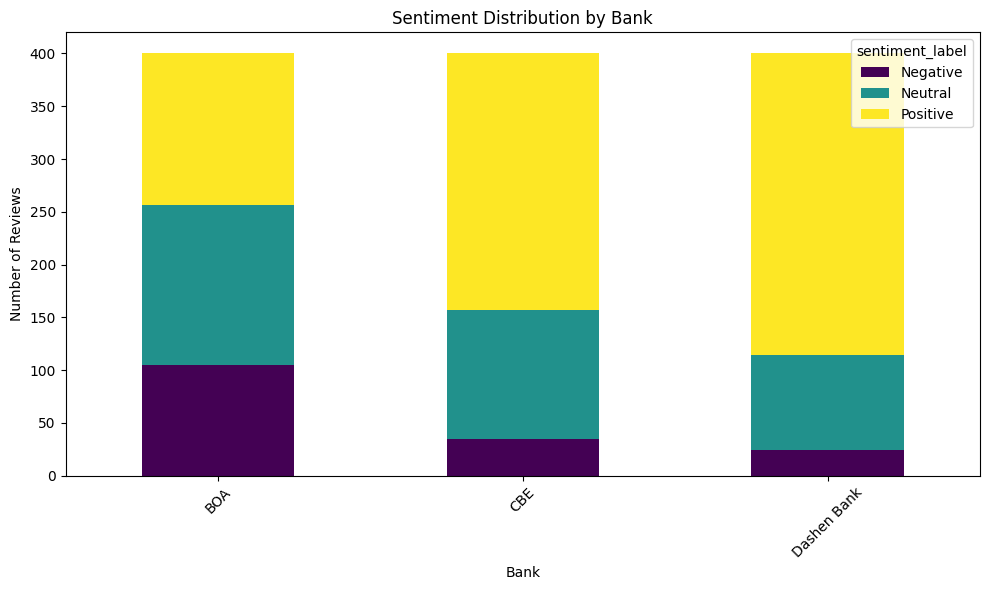

In [14]:
sentiment_by_bank.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')
plt.title('Sentiment Distribution by Bank')
plt.xlabel('Bank')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


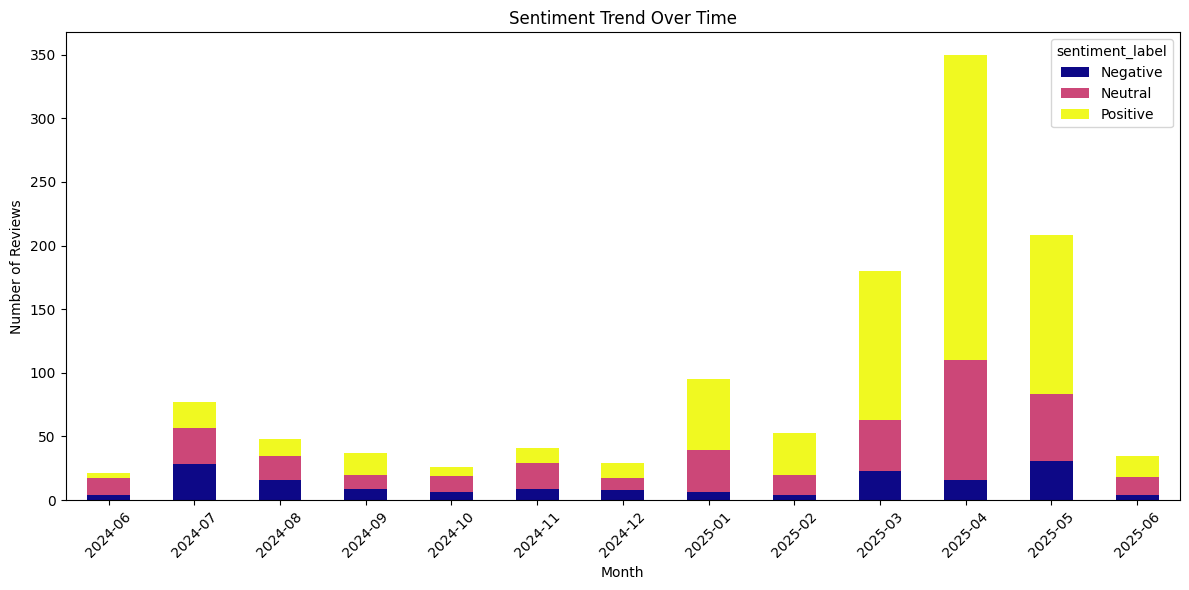

In [15]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df['month'] = df['date'].dt.to_period('M').astype(str)
sentiment_over_time = df.groupby(['month', 'sentiment_label']).size().unstack().fillna(0)
sentiment_over_time = sentiment_over_time.sort_index()
sentiment_over_time.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='plasma')
plt.title('Sentiment Trend Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [21]:
import hf_xet
print("hf_xet is installed and working")


hf_xet is installed and working
